# This notebook is for A2: Bias in data
## It will focus on the agression and toxicity datasets from            
## https://figshare.com/projects/Wikipedia_Talk/16731

### In this notebook I will be atempting to answer the following questions: 
1. (A) Do demographics have a different idea of what agression is (not uniform distribution)?
   (B) The same question but for toxicity
   
2. (A) Will annotators from high school label less comments as agressive than annotators with a master's or doctorate?
   (B) The same question but for toxicity
 
   
3. Will there be a positive linear correlation between the number of aggressive labeled comments and toxic labeled comments when grouped by age?

4. There is an even distribution of answers from the age and education demographics?

The reason why I chose the first two questions was because I wanted to make sure the dataset had some variation and wanted to see if it was in line with the idea that as people get older they become more sensitive. The reason why I asked the third question is because I would expect the toxic comment count and aggressive comment count to be linearly correlated. The fourth question was asked to find out if the dataset was bias towards a certain age or education level.

## **Step 1** Import the libraries needed

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Step 2** Import the data

### 2.1 This loads the data from the agression and toxicity csvs (Note they are \t separated)

In [90]:
agression_annotations = pd.read_csv('aggression_annotations.tsv', sep='\t')
a_demographics = pd.read_csv('aggression_worker_demographics.tsv', sep='\t') 

toxicity_annotations = pd.read_csv('toxicity_annotations.tsv', sep='\t')
t_demographics = pd.read_csv('toxicity_worker_demographics.tsv', sep='\t') 

### 2.2 Join the csvs into their completed versions for agression and toxicity

In [91]:
# This is done
anno_demo = agression_annotations.join(a_demographics.set_index('worker_id'), on='worker_id')

t_anno_demo = toxicity_annotations.join(t_demographics.set_index('worker_id'), on='worker_id')

## **Step 3** Extract education, age, and gender from the dataframes

### 3.1 Do the above extraction for the agression dataframe

In [94]:
# Here I am getting the aggression education demographic
none = anno_demo.loc[anno_demo['education'] == 'none']
hs = anno_demo.loc[anno_demo['education'] == 'hs']
bachelors = anno_demo.loc[anno_demo['education'] == 'bachelors']
masters = anno_demo.loc[anno_demo['education'] == 'masters']
doc = anno_demo.loc[anno_demo['education'] == 'doctorate']
pro = anno_demo.loc[anno_demo['education'] == 'professional']

ages = ['Under 18', '18-30', '30-45', '45-60', 'Over 60']
gender = ['female', 'male']

# Here I am getting the aggression age demographic
_17 = anno_demo.loc[anno_demo['age_group'] == ages[0]]
_30 = anno_demo.loc[anno_demo['age_group'] == ages[1]]
_45 = anno_demo.loc[anno_demo['age_group'] == ages[2]]
_60 = anno_demo.loc[anno_demo['age_group'] == ages[3]]
old = anno_demo.loc[anno_demo['age_group'] == ages[4]]

# Here I am getting the aggression gender demographic
f = anno_demo.loc[anno_demo['gender'] == gender[0]]
m = anno_demo.loc[anno_demo['gender'] == gender[1]]

### 3.2 Create 3 dataframes that contain the amount of agressivly labeled comments based on (education, age, and gender)

In [97]:
ae =pd.DataFrame({"aggressive count": [sum(list(none['aggression'])), sum(list(hs['aggression'])), sum(list(bachelors['aggression'])),
                                      sum(list(masters['aggression'])), sum(list(doc['aggression'])), sum(list(pro['aggression']))],
                  "Education": ["None", "HS", "Bachelors", "Masters", "Doc.", "Pro"] })

aa =pd.DataFrame({"aggressive count": [sum(list(_17['aggression'])), sum(list(_30['aggression'])), sum(list(_45['aggression'])),
                                      sum(list(_60['aggression'])), sum(list(old['aggression']))],
                  "Age": ages })

ag =pd.DataFrame({"aggressive count": [sum(list(f['aggression'])), sum(list(m['aggression']))],
                  "Gender":gender })

### 3.3 Do the above extraction for the toxicity dataframe

In [98]:
# Here I am getting the toxicity education demographic 
none = t_anno_demo.loc[t_anno_demo['education'] == 'none']
hs = t_anno_demo.loc[t_anno_demo['education'] == 'hs']
bachelors = t_anno_demo.loc[t_anno_demo['education'] == 'bachelors']
masters = t_anno_demo.loc[t_anno_demo['education'] == 'masters']
doc = t_anno_demo.loc[t_anno_demo['education'] == 'doctorate']
pro = t_anno_demo.loc[t_anno_demo['education'] == 'professional']

ages = ['Under 18', '18-30', '30-45', '45-60', 'Over 60']
gender = ['female', 'male']

# Here I am getting the toxicity age demographic
_17 = t_anno_demo.loc[t_anno_demo['age_group'] == ages[0]]
_30 = t_anno_demo.loc[t_anno_demo['age_group'] == ages[1]]
_45 = t_anno_demo.loc[t_anno_demo['age_group'] == ages[2]]
_60 = t_anno_demo.loc[t_anno_demo['age_group'] == ages[3]]
old = t_anno_demo.loc[t_anno_demo['age_group'] == ages[4]]

# Here I am getting the toxicity gender demographic
f = t_anno_demo.loc[t_anno_demo['gender'] == gender[0]]
m = t_anno_demo.loc[t_anno_demo['gender'] == gender[1]]

### 3.4 Create 3 dataframes that contain the amount of toxicly labeled comments based on (education, age, and gender)

In [99]:
te =pd.DataFrame({"toxicity count": [sum(list(none['toxicity'])), sum(list(hs['toxicity'])), sum(list(bachelors['toxicity'])),
                                      sum(list(masters['toxicity'])), sum(list(doc['toxicity'])), sum(list(pro['toxicity']))],
                  "Education": ["None", "HS", "Bachelors", "Masters", "Doc.", "Pro"] })

ta =pd.DataFrame({"toxicity count": [sum(list(_17['toxicity'])), sum(list(_30['toxicity'])), sum(list(_45['toxicity'])),
                                      sum(list(_60['toxicity'])), sum(list(old['toxicity']))],
                  "Age": ages })

tg =pd.DataFrame({"toxicity count": [sum(list(f['toxicity'])), sum(list(m['toxicity']))],
                  "Gender":gender })

### 3.5 Combine the aggression and toxicity data frames into 3 final dataframes

In [101]:
education = ae.join(te.set_index('Education'), on='Education')
education = education.set_index('Education')

age = aa.join(ta.set_index('Age'), on='Age')
age = age.set_index('Age')

gender = ag.join(tg.set_index('Gender'), on='Gender')
gender = gender.set_index('Gender')

## **Step 4** Display

## 4.1 These are the dataframes created above <a id='cell'></a>

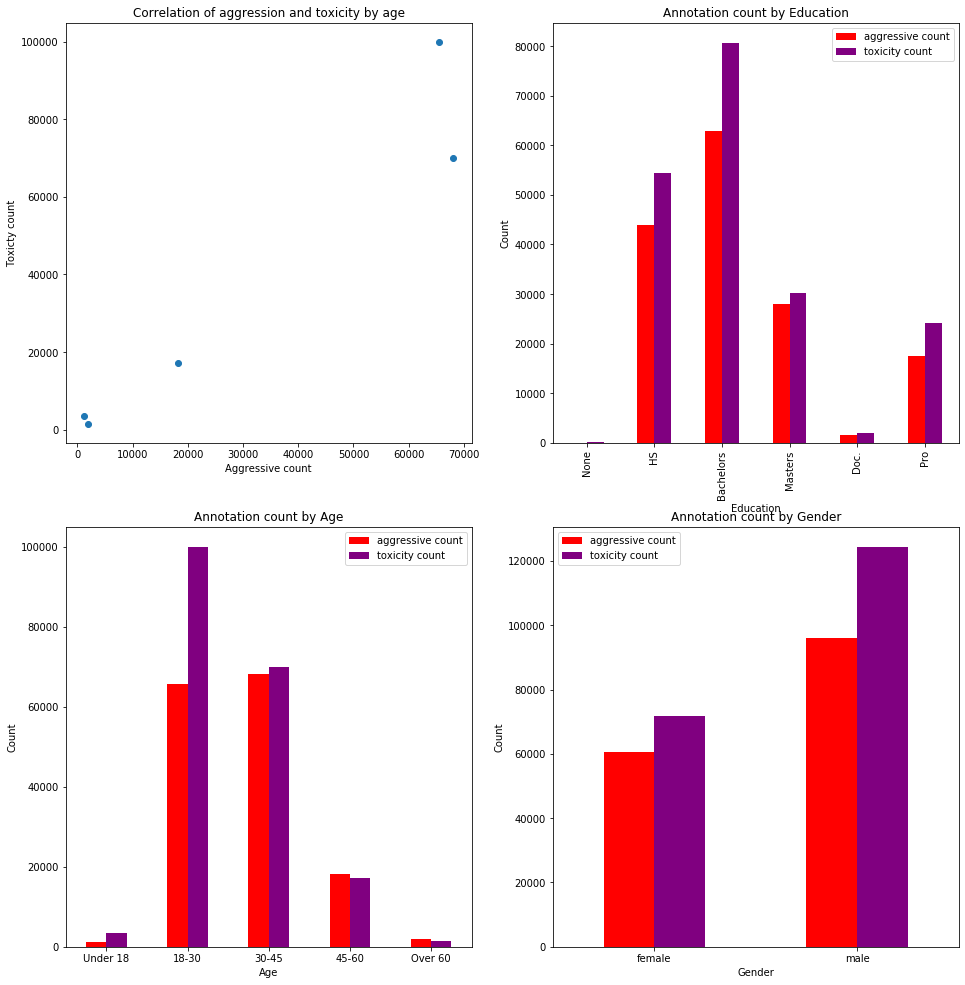

In [131]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16,17))
# Formating for the subplot
axes[0,0].set_title("Correlation of aggression and toxicity by age")
axes[0,0].set_xlabel("Aggressive count")
axes[0,0].set_ylabel("Toxicty count")
axes[0,0].scatter(x=age['aggressive count'], y=age['toxicity count'])

# Formating for the subplot
axes[0,1].set_title("Annotation count by Education")
axes[0,1].set_xlabel("Education")
axes[0,1].set_ylabel("Count")
education.plot(kind='bar',color=['red', '#800080'], ax=axes[0,1])

# Formating for the subplot
axes[1,0].set_title("Annotation count by Age")
axes[1,0].set_xlabel("Age")
axes[1,0].set_ylabel("Count")
age.plot(kind='bar',rot=0, color=['red', '#800080'], ax=axes[1,0])

# Formating for the subplot
axes[1,1].set_title("Annotation count by Gender")
axes[1,1].set_xlabel("Gender")
axes[1,1].set_ylabel("Count")
gender.plot(kind='bar',rot=0, color=['red', '#800080'], ax=axes[1,1])

plt.savefig("first_graph.png")

## This is a snippet of the toxicity data

In [112]:
t_anno_demo.head()

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,female,0.0,30-45,bachelors
1,2232.0,4000,0,0.0,male,1.0,18-30,hs
2,2232.0,3989,0,1.0,female,0.0,18-30,bachelors
3,2232.0,3341,0,0.0,NaN,NaN,NaN,NaN
4,2232.0,1574,0,1.0,female,0.0,30-45,bachelors


## This is a snippet of the aggression data

In [108]:
anno_demo.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0.0,18-30,masters
1,37675,2408,0.0,1.0,male,1.0,30-45,hs
2,37675,1493,0.0,0.0,female,0.0,30-45,bachelors
3,37675,1439,0.0,0.0,male,0.0,18-30,hs
4,37675,170,0.0,0.0,NaN,NaN,NaN,NaN


## 4.2 The distribution of annotator demographics in this experiment based on age and education level <a id='another_cell'></a>

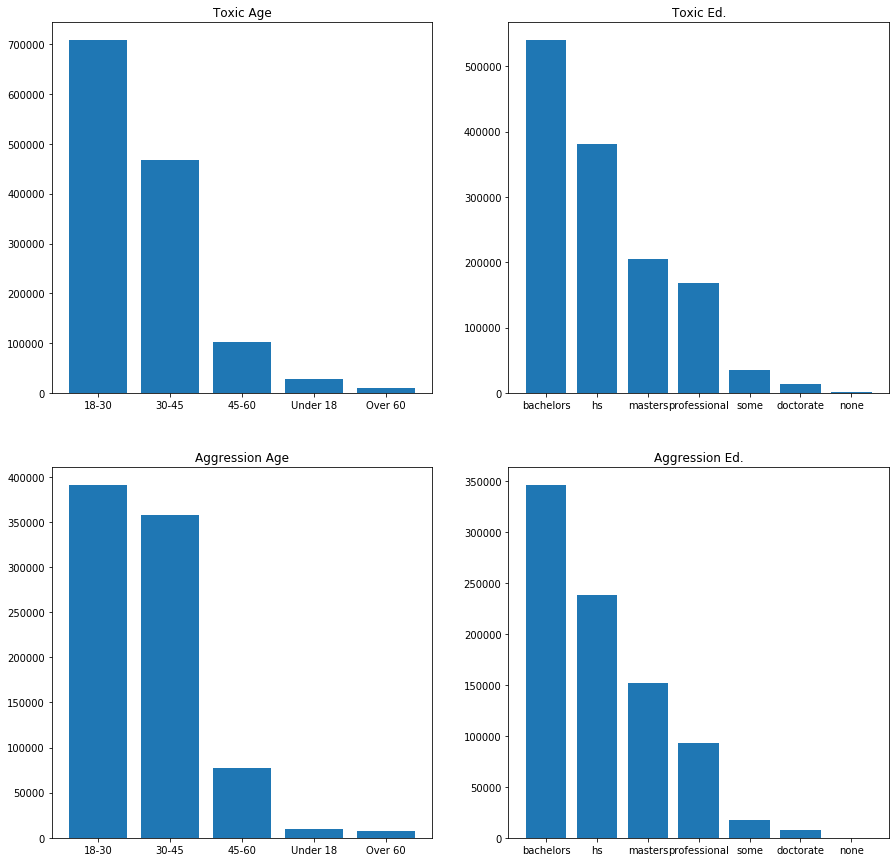

In [134]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,15))
ax1.set_title("Toxic Age")
ax1.bar(list(t_anno_demo.age_group.value_counts().index), t_anno_demo.age_group.value_counts())
ax2.set_title("Toxic Ed.")
ax2.bar(list(t_anno_demo.education.value_counts().index), t_anno_demo.education.value_counts())

ax3.set_title("Aggression Age")
ax3.bar(list(anno_demo.age_group.value_counts().index), anno_demo.age_group.value_counts())
ax4.set_title("Aggression Ed.")
ax4.bar(list(anno_demo.education.value_counts().index), anno_demo.education.value_counts())
plt.savefig("second_graph.png")

## Presentation of results:

As you can see from the three bar charts from cell [4.1](#cell) the answer to question 1 is that the different demographics have varying ideas of what toxic/aggressive comments are, there is not a uniform distribution across the different ages, education levels, or genders. If there was a uniform distribution this would make the data appear to be generic.

Regarding question 2, from the top right chart on [4.1](#cell) we can see that high school students labeled more comments as toxic/aggressive than people that had a masters degree or doctorate. This is unexpected, I'd assume that people with a higher education would find more things offensive.

Regarding question 3 after analyzing the top left chart on [4.1](#cell) there is a positive linear correlation but it is not strictly positive. Generally as someone gets older, the amount of comments they perceive as aggressive is linearly correlated with the amount of comments they perceive as toxic.

To answer question 4, we can see from the charts generated in cell [4.2](#another_cell) that there is a clear bias in the people selected to participate in this annotation process. There is a significant amount of more people that only completed highschool or got their bachelors degree than any other category. Also, there is a significant amount of more people that are from ages 18-30, or 30-45 than any other age group. The result of this bias is that these comments are mainly viewed as toxic or aggressive by young people. This means that any model created on this dataset will only find comments that younger people think are negative, completely ingoring comments that older generations and highly educated people think are negative.

## Implications for research and product development:

3. What are some other contexts or applications where you would expect the Perspective API to perform particularly well, or particularly poorly? Why?

I would expect this to do very well in filtering out certain content from a social media thread or timeline. For example, if somone wanted to stop seeing "Election" on their feed this model should be able to identify that word and different variations of it. The reason why I say, it looks like it would perform well is because of the commnet slider demo application. That application is able to find climate change related comments and display them, so it should be able to do the opposite as well.


4. What are some kinds of hostile speech that would be difficult to accurately detect using the approach used to train the Perspective API models? 

This model would not be great at detecting sarcastic comments. From what I saw the comments that it could detect were obviously hostile but I don't think it would flag a passive aggressive or sarcastic comment. An example would be "Nooooo of courssssse you're supposed to do that what else would you dooooooo?"

6. Imagine you are one of the Google data scientists who maintains the Perspective API. If you wanted to improve the model or the API itself to make it work better for any of these purposes, how should they go about doing that?

In order to imporve this model I would adapt it to use some modern practices in the NLP space such as Transformers. If I didn't want to incorporate a new structure to the model I would just do transfer learning from one of the most succuessful NLP models out. Leveraging the weights of the new model and tuning them one the data that was used to train the Perspective API model.
